In [38]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import datasets


california_housing = datasets.fetch_california_housing()
california_housing_df = pd.DataFrame(california_housing.data, columns=california_housing.feature_names)

In [39]:
num_of_data = 20640

def create_dataset(feature1, feature2):
    data = np.ndarray((len(california_housing_df[feature1]), 2))
    for i in range(0, data.shape[0]):
        array_1d = np.ndarray(2)
        array_1d[0] = california_housing_df[feature1][i]
        array_1d[1] = california_housing_df[feature2][i]
        data[i] = array_1d
    return data
    
data = create_dataset("AveRooms", "AveBedrms")
print(data)

[[6.98412698 1.02380952]
 [6.23813708 0.97188049]
 [8.28813559 1.07344633]
 ...
 [5.20554273 1.12009238]
 [5.32951289 1.17191977]
 [5.25471698 1.16226415]]


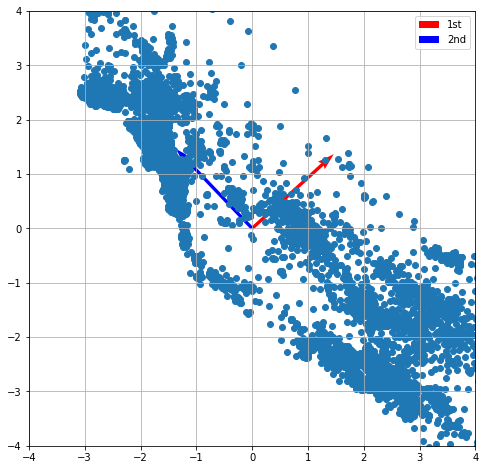

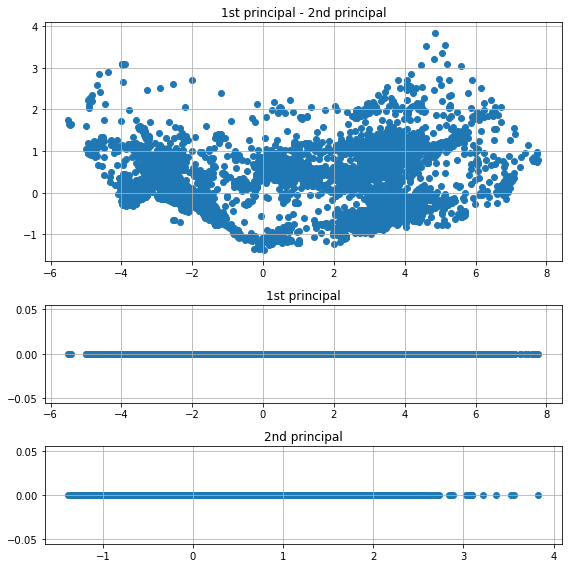

In [41]:
def pca_use_org(data):
    # ##################### 主成分分析 ########################
    # 共分散行列を求める
    cov_matrix = np.cov(data, rowvar=False)
 
    # 固有値と固有ベクトルを取得する
    l, v = np.linalg.eig(cov_matrix)
 
    # 固有値を大きい順に並べる
    l_index = np.argsort(l)[::-1]
    l_ = l[l_index]
    v_ = v[:, l_index]
 
    # 固有ベクトルを使ってデータを変換する
    data_trans = np.dot(data, v_)
 
    return data_trans, v_
 
 
if __name__ == "__main__":
    # ###################### データ作成 ########################
    # データセットから2次元データを切り出す
    data = create_dataset("Latitude", "Longitude")

 
    # データ全体の平均を0にする
#     print('data=', data)
    data -= data.mean(axis=0)
#     print('data=', data)
 
    # #################### 主成分分析開始 #######################
    # 自作関数(numpyはその限りではない)でPCA
    data_trans, v = pca_use_org(data)
 
    # ###################### 作図準備 ###########################
    # 変換軸となるベクトルを描画用の変数に格納
    vec_s = [0, 0]
    vec_1st_e = [2*v[0, 0], 2*v[0, 1]]
    vec_2nd_e = [2*v[1, 0], 2*v[1, 1]]
 
    # ######################## 作図開始 ########################
    # -------------------- 変換前データと変換軸ベクトル ---------
    plt.figure(figsize=[8, 8])
    plt.xlim(-4, 4)
    plt.ylim(-4, 4)
    plt.quiver(vec_s[0], vec_s[1], vec_1st_e[0], vec_1st_e[1],
               angles='xy', scale_units='xy', scale=1, color='r', label='1st')
    plt.quiver(vec_s[0], vec_s[1], vec_2nd_e[0], vec_2nd_e[1],
               angles='xy', scale_units='xy', scale=1, color='b', label='2nd')
    plt.grid()
    plt.legend()
    plt.scatter(data[:, 0], data[:, 1])
    plt.savefig('charts/fig-3.png')
 
    # -------------- 変換後データ、第1主成分、第2主成分 ---------
    plt.figure(figsize=[8, 8])
    plt.subplot2grid((4, 1), (0, 0), rowspan=2)
    plt.title('1st principal - 2nd principal')
    plt.grid()
    plt.scatter(data_trans[:, 0], data_trans[:, 1])
    plt.subplot2grid((4, 1), (2, 0))
    plt.tick_params(labelleft="off", left="off")
    plt.title('1st principal')
    plt.grid()
    plt.scatter(data_trans[:, 0], np.zeros(len(data_trans[:, 0])))
    plt.subplot2grid((4, 1), (3, 0))
    plt.title('2nd principal')
    plt.grid()
    plt.tick_params(labelleft="off", left="off")
    plt.scatter(data_trans[:, 1], np.zeros(len(data_trans[:, 1])))
    plt.tight_layout()
    plt.show()